# Pima Diabetes Data Set 

Columns

* pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age (years)
*  Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for diabetes

Class distribution: 
* 0 : 500 (healthy)
* 1 : 268 

Data characteristics:

The database contains only data about female patients who are of Pima heritage and are 21 or older
All the attributes are numeric
The data may contain invalid or null values
Total number of cases presented are 786

## Loading Libraries

* your task is to load the libraries that you usually need (Pandas , numpy, maplotlib.pyplot )
* you can add the 'as' keyword so that you can use an abbreviation to call the function from the libraries
* for example: import numpy as np

In [1]:
# show plots inside the notebook  
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

* your task is to load the dataset
* the dataset is located here: "data/diabetes.csv"
* it is a csv file so you need a function for pandas to load the csv file
* and you need to store the result into a variable

In [2]:
diabetes_dataset = pd.read_csv("data/diabetes.csv")

Data Set Information:

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima heritage. 

Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) - Outcome - Target

## Data Checking

* you have created the dataset object now use the method .info() to get more information of the dataset

In [3]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* visualise on screen the 5 rows of the dataset by using the method .head() on your dataset object

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* now use the method describe()

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* your task now is to see if the target distribution is balanced. Do we have the same ammount of 0 and 1 in the outcome column. There are several way to achieve this, in the solution you will see a new way but use the one you prefer or google an alternative solution

using value_counts()

In [6]:

diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Now we know that there are 768 people with an uneven distribution of the outcome (healthy:sick = 500:268). 

## Data Stratification

When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

* YOUR TURN . load the train_test_split module from sklearn.model_selection

In [7]:
from sklearn.model_selection import train_test_split 

* YOUR TURN create the x and y (the features and the target variables) Using the code that we used in the previous notebook

In [8]:
x = diabetes_dataset.drop('Outcome',axis=1)
y = diabetes_dataset['Outcome']

* YOUR TURN divide into training and testing and use STRATIFY with the column Outcome
* use random_state=101 if you want to have the same output at the end as mine

In [9]:
# divide into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=diabetes_dataset['Outcome'], random_state=101) 

## Make the Model

* YOUR TURN import the LogisticRegression module from sklearn.linear_model

In [10]:
from sklearn.linear_model import LogisticRegression

* YOUR TURN create the model by calling LogisticRegression and assigning to a variable that you can call model

In [27]:
model = LogisticRegression(max_iter=200)

* YOUR TURN fit the data to the model (X_train and y_train)

In [28]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

YOUR TURN collect the prediction into a variable called prediction from your x_test data

In [29]:
prediction = model.predict(X_test)

**accuracy**

... is the percentage of correct predictions.

* YOUR TURN import the module metrics from sklearn

In [30]:
# calculate accuracy
from sklearn import metrics

YOUR TURN calculate and print the accuracy score (use y_test and prediction) and accuracy score or simply score (x_test,y_test)

In [31]:
print(metrics.accuracy_score(y_test, prediction))

0.7552083333333334


**Confusion Matrix**

YOUR TURN from sklearn.metrics import confusion_matrix

In [16]:
from sklearn.metrics import confusion_matrix

YOUR TURN print the confusion matrix

In [17]:
confusion_matrix(y_test, prediction)
# column prediction
# row true value

array([[112,  13],
       [ 34,  33]])

the visual respresentation of the confusion matrix helps a lot. We can see the following in the table:

index 0 = class 0: Person will have diabetes in 5 years<br />
index 1 = class 1 : Person will NOT have diabetes in 5 years

**True Positives (TP)**: (35) we correctly predicted that they do have diabetes<br />
**True Negatives (TN)**: (112) we correctly predicted that they don't have diabetes<br />
**False Positives (FP)**: (32) we incorrectly predicted that they do have diabetes<br />
**False Negatives (FN)**: (13) we incorrectly predicted that they don't have diabetes

From these values we can calculate the following classification metrics:

**Sensitivity** (aka "True Positive Rate" or "Recall"): When the actual value is positive, how often is the prediction correct?
- Something we want to maximize
- How "sensitive" is the classifier to detecting positive instances?




### classification report

YOUR TURN from sklearn.metrics import classification_report

In [18]:
from sklearn.metrics import classification_report

YOUR TURN print the classification report of your y_test and prediction

In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       125
           1       0.72      0.49      0.58        67

    accuracy                           0.76       192
   macro avg       0.74      0.69      0.71       192
weighted avg       0.75      0.76      0.74       192



Right now we have a model that is quiet good in correctly detecting if a patient is healthy in 5 years (112 true negative == 0.90% of recall). But I think it's more important to find people, which will be sick in 5 years to apply preventive measures. We can adjust our model by changing the classification threshold.

**Classification Threshold**

YOUR TURN save in a variable called save_predictions_proba the predicted probability from your X_test of being survived (column 1 of the predicted probability)

In [20]:
save_predictions_proba = model.predict_proba(X_test)[:, 1]  # column 1

YOUR TURN print the histogram of the predicted probabilities so that you can have an idea of what other threshold you can potentially use to construct a model with higher recall

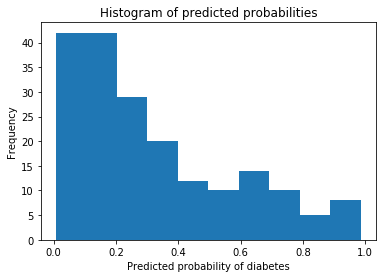

In [21]:
# histogram of predicted probabilities
plt.hist(save_predictions_proba, bins=10)

plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

Just a small number of observations with probability > 0.5, most observations have a probability < 0.5 and would be predicted "no diabetes" in our case. We can increase the sensitivity (increase number of TP) of the classifier by decreasing the threshold for predicting diabetes.

YOUR TURN from sklearn.preprocessing import binarize

In [22]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

YOUR TURN use the binarize class that you imported to store in a variable prediction2 the new predictions with a threshold of 0.3 (remember that you need to reshape the save_predictions_proba you created before

In [23]:
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
prediction2 = binarize(save_predictions_proba.reshape(-1, 1), 0.3)  # [0]

YOUR TURN print the new confusion matrix (y_test and prediction2)
PS. you already imported the library 

In [24]:
metrics.confusion_matrix(y_test, prediction2)

# before was
# array([[112,  13],
     #  [ 32,  35]],
   

array([[94, 31],
       [18, 49]])

YOUR TURN print the classification report

In [25]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       125
           1       0.61      0.73      0.67        67

    accuracy                           0.74       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.74      0.75       192



Observations: 

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity

- Adjusting the threshold should be one of the last steps you do in the model-building process